In [72]:
import repository
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


style = plt.style.library['seaborn-darkgrid']
plt.style.use(style)

Number of index words: 48940


Text(0, 0.5, 'Num. of words')

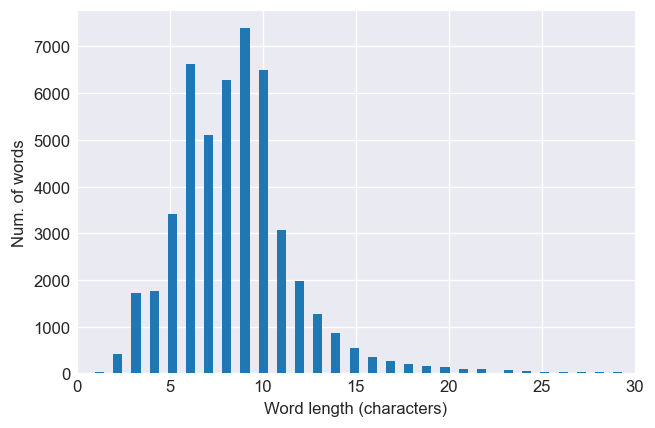

In [73]:
index_words = repository.get_all_index_words()

print(f"Number of index words: {len(index_words)}")

word_lengths = [len(w[0]) for w in index_words]
plt.figure(dpi=120, facecolor='white')
plt.hist(word_lengths, bins=350)
plt.xlim(0,30)
plt.xlabel("Word length (characters)")
plt.ylabel("Num. of words")

Text(0.5, 0, 'Words')

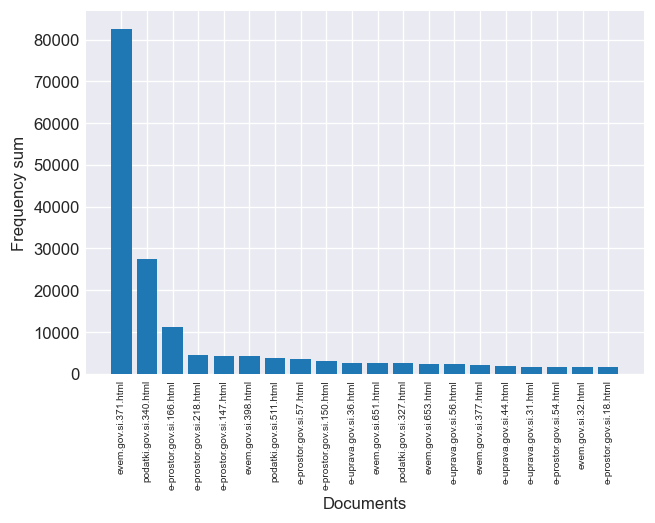

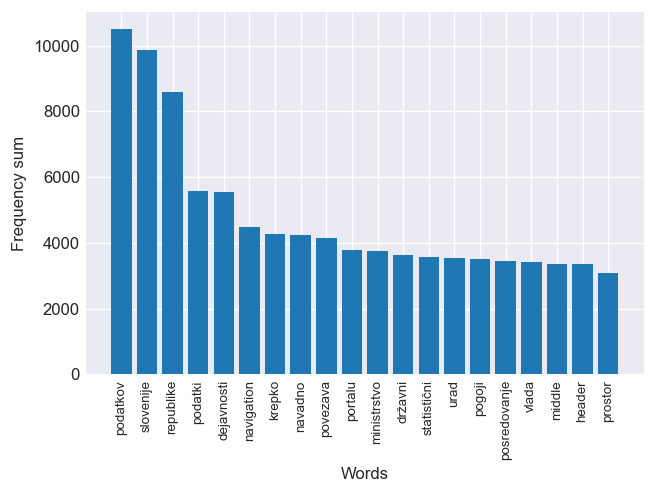

In [76]:
postings = pd.DataFrame(repository.get_all_postings())
postings.columns = ["word", "document", "frequency", "indexes"]
postings['document'] = postings['document'].apply(lambda x: x.split('/')[1])
postings = postings.drop(columns=['indexes'])

doc_freqs = postings[['document', 'frequency']].groupby(['document']).sum()
doc_freqs = doc_freqs.sort_values(by='frequency', ascending=False).head(20)
plt.figure(dpi=120, facecolor='white')
plt.bar(doc_freqs.index, doc_freqs['frequency'])
plt.xticks(rotation=90, fontsize=6)
plt.ylabel("Frequency sum")
plt.xlabel("Documents")

word_freqs = postings[['word', 'frequency']].groupby(['word']).sum()
word_freqs = word_freqs.sort_values(by='frequency', ascending=False).head(20)
plt.figure(dpi=120, facecolor='white')
plt.bar(word_freqs.index, word_freqs['frequency'])
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Frequency sum")
plt.xlabel("Words")

# df_agg = postings.groupby(['document','word']).agg({'frequency':sum})
# g = pd.DataFrame(df_agg['frequency'].groupby('document', group_keys=False).nlargest(3))
# mergedDf = g.merge(doc_freqs, left_index=True, right_index=True)
# final_df = mergedDf.sort_values(by=['frequency_y'], ascending=False)
# final_df.drop(columns='frequency_y', inplace=True)
# print(final_df.to_latex()) 